#Observables and operators: The Kinetic Energy operator

![](files/Animated_illustration_of_inflection_point.gif)

## Introduction

In this iPython notebook, we'll revisite the kinetic energy operator. We will use the wavefunctions of the 1D particle in a box as an example to illustrate the calculation of the kinetic energy analytically and numerically. We will revisite the relationship between observables and operators, and what happens with the observables when our wavefunction is a superposition of two or more eigenstates.

We'll **review** some of the stuff you've learned so far : 

1.  Integration with scipy.integrate.simps
2.  The eigenfunctions of the 1D particle in a box.

And we'll play around with some **new concepts** :

1.  Differentiation by finite differences.


## Before you start ...

You will find two symbols in this ipython notebook: <i class="fa fa-book"></i> and <i class="fa fa-wrench"></i>. If an step has the symbol <i class="fa fa-book"></i> you will know that you only need to read and execute the boxes. If you find a step with <i class="fa fa-wrench"></i> that is telling you that apart from reading you will have to complete some code. The instructions to complete the code are in capital letters.

## Have fun!


 ## <i class="fa fa-book"></i> Step 1: As always, start by importing the modules you'll need

In [120]:
#As always, import the modules you'll need
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## <i class="fa fa-wrench"></i> Step 2: Let's define some functions

First we'll write a function that returns a valid wavefunction for the 1D particle in a box. We will use this function later in this demo. We saw the expression for this wavefunction in the previous lecture:

$$ \psi_n(x)=\sqrt{\frac{2}{L}}\sin(\frac{n\pi x}{L}) $$ 

Since you learnt how to write this function last lecture go ahead and **complete the definition of the function below** (just warming up): 

In [121]:
######################################################################
# COMPLETE THE FUNCTION BELOW
# GIVEN x, L, AND n RETURNS AND EIGENFUNCTION FOR THE 1D PARTICLE IN A BOX
# Inputs: x -- numpy array. 
#        L -- scalar, length of the box. 
#        n -- integer

def box_1D_eigenfunction(x, L, n):
    psi_x = np.sqrt(2.0/L) * np.sin(n*np.pi*x/L)
    return psi_x

########################################################################

## <i class="fa fa-book"></i> Step 3. Defining the Kinetic energy operator ($\hat{T}$)

The **kinetic energy operator**, which like all other operators acts on wave functions, is given by:<br>

$$ \hat{T} = \frac{\hat{p}^2}{2m}=-\frac{\hbar^2}{2m}\frac{\partial^2 }{\partial x^2}$$

So, for example, let's apply the kinetic energy operator to the solutions to the 1_D particle in a box:

$$ \hat{T} \psi_n(x) =-\frac{\hbar^2}{2m}\frac{\partial^2 }{\partial x^2} \sqrt{\frac{2}{L}}\sin(\frac{n\pi x}{L}) = (-\frac{\hbar^2}{2m}) (-\frac{n^2 \pi^2}{L^2}) \sqrt{\frac{2}{L}}\sin(\frac{n\pi x}{L}) = \frac{\hbar^2 n^2 \pi^2}{2m L^2} \psi_n(x) $$

This case is simple, and we get a nice and clean analytical expression. However not all the wavefunctions are as easy as the solutions for the particle in a box, and in fact, many wavefunctions don't even have analytical expressions. In many cases our wavefunction is just a vector of numbers that we obtain from a numerical calculation in a computer.

How do we compute the kinetic energy operator in those cases? Well, the kinetic energy operator is a second derivative and we can approximate its action on the wavefunction using the method of finite differences (https://en.wikipedia.org/wiki/Finite_difference): 

$$ \frac{\partial^2\psi(x) }{\partial x^2}\sim \frac {\psi(x+\Delta x) - 2\psi(x) + \psi(x -\Delta x)}{(\Delta x) ^2}$$

We've written a function called kinetic_energy_operator that employs the formula above to approximate the kinetic energy operator. **Read the function below and understand how the code matches the finite difference approximation of the kinetic energy operator.**

In [122]:
def kinetic_energy_operator(x, psi_x, h_bar = 1, m = 1):
    '''This python function uses a central difference approximation 
    to get the second derivative of the function psi_x over the range x
    Input:
        -- x is an array of values
        -- psi_x is an array of values, corresponding to the wave function evaluated at x. (same length as x) 
    '''
    dx = x[1] - x[0] #this is delta x
    second_derivative = np.zeros_like(x) #an array of zeroes, same length as x. 
    for i in range(len(x)): #for each element in 
        if i==0:
            #forward differences for approximating the second derivative of psi_x at the first value of x, x[0]
            second_derivative[i] = ( psi_x[i+2]  - 2*psi_x[i+1] + psi_x[i] ) / dx**2
        elif i==(len(x)-1):
            #backwards differences for approximating the second derivative of psi_x at the last value of x, x[-1]
            second_derivative[i] = ( psi_x[i] - 2*psi_x[i-1] + psi_x[i-2] ) / dx**2
        else:
            #central differences for all other values of x
            ####
            ###(ONE LINE) WRITE A SINGLE LINE OF CODE THAT ASSIGNS TO second_derivative[i] THE NUMERICAL APPROX. 
            ###TO THE SECOND DERIVATIVE USING THE CENTRAL DIFFERENCE APPROXIMATION
            second_derivative[i] = ( psi_x[i+1] - 2*psi_x[i] + psi_x[i-1] ) / dx**2
            ####
            
    T_on_psi = -h_bar**2/(2.0*m)*second_derivative
    return T_on_psi
        

## <i class="fa fa-wrench"></i> Step 4: Compare the analytical expression for the kinetic energy operator with its finite difference  approximation.

Now we want to compare the analytical expression of the kinetic energy operator with the finite difference approximation, in order to verify the approximation is working well. We are going to do that for the eigenfunctions of the 1-D particle in a box ($\psi(x)$).

You will have to 1) call the function we defined above to calculate $\hat{T}\psi(x)$ with finite differences and 2) write the analytical expression of $\hat{T}\psi(x)$. The expression is defined in step 3.

In [123]:
# Firts let's choose x, L, and n for our wavefunction
L = 10
x = np.arange(0,L,0.001)
n = 3
h_bar = 1
m = 1

# Generate the eigenfunction 
psi_x = box_1D_eigenfunction(x,L,n)

#########################################################################################################
# CALL THE kinetic_energy_operator FUNCTION TO CALCULATE
#  T ACTING ON PSI USING FINITE DIFFERENCES (1 LINE OF CODE)
T_on_psi_numerical = kinetic_energy_operator(x, psi_x, h_bar, m)
#########################################################################################################

#########################################################################################################
# WRITE HERE THE ANALYTICAL EXPRESSION FOR T ACTING ON PSI 
# (1 LINE OF CODE)
T_on_psi_analytical = (h_bar**2/(2.0*m))*(n*np.pi/L)**2*psi_x
#########################################################################################################

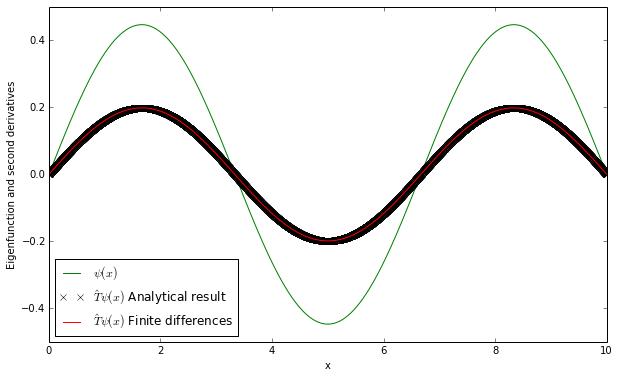

In [124]:
#And let's plot them (This code do not need to be modified)

fig=plt.figure(figsize=(10,6))
plt.plot(x , psi_x, 'g-' ,label='$\psi(x)$') #Plot the wave function
plt.plot(x, T_on_psi_analytical, 'kx',label="$\hat{T}\psi(x)$ Analytical result" ) # Plot T acting on the wave function, analytical result
plt.plot(x, T_on_psi_numerical, 'r-',label="$\hat{T}\psi(x)$ Finite differences" ) # Plot T acting on the wave function, numerical result
plt.xlabel('x')
plt.ylabel('Eigenfunction and second derivatives')
plt.legend(loc='lower left')
plt.show()

Do you think the finite difference approximation is working well or not? Try other values of $n$ as well.

## <i class="fa fa-wrench"></i> Step 5: Calculate the expectation value of the Kinetic Energy Operator when the wavefunction is an eigenfunction.

OK, things are looking good. Now that we have the operator that corresponds to the Kinetic Energy observable, we can get it's expectation value:
$$ \langle \hat{T} \rangle = \int \psi^{*}(x) \hat{T} \psi(x) dx $$
From the expression in step 3, we can deduce the expectation value of the kinetic energy operator for the eigenfunctions of the 1-D particle in a box:
$$ T_n = \frac{\hbar^2 n^2 \pi^2}{2m L^2} $$

Now write a fuction that returns the analytical value of $T_n = E_n$, the kinetic energy of the $n$-th eigenfunction:

In [125]:
####################################################
# COMPLETE THE DEFINITION OF THE FUNCTION BELOW 
# The function should receive as arguments: n, L, h_bar and m.
# HINT: See the equation above

def analytical_T_n(n, L, h_bar=1, m=1):
    T_analytical = (n*h_bar*np.pi)**2 / (2.0*m*L**2)
    return T_analytical

####################################################

Next, we want to compare the analytical expectation value with the expectation value calculated with the finite difference approximation. Let's write some code that let's us take the expectation value of $\hat{T}$, $\langle \hat{T} \rangle$, for a given wavefunction. To do this, we will need to integrate $\psi^*(x)\hat{T}\psi(x)$. In the following code complete the expression for the integrand and the value of the integral. Check out the syntax of the simps function in the cheat sheep if you don't remember it:

In [126]:
from scipy.integrate import simps # this is an alternative function to integrate, using Simpson's rule

#let's set h_bar and m equal to 1, for now 
h_bar = 1
m = 1

#We will take the expectation value of T when the wave function is the n=1 eigenstate.
#define x, L, and n
L = 10
x = np.arange(0,L,0.01)
n = 3

#### Now, to get the expectation value:

#First we get the wave function (\psi)
psi_x = box_1D_eigenfunction(x, L, n)

#Next we get T acting on the wave function (T |psi)
T_on_psi = kinetic_energy_operator(x, psi_x)

################################################################
# NOW COMPLETE THE EXPRESSION FOR THE INTEGRAND
# Remember that our integrand is conjugate(psi_x) T psi_x
integrand = np.conjugate(psi_x)*T_on_psi 
################################################################

################################################################
# NOW CALCULATE THE EXPECTATION VALUE BY INTEGRATING USING SIMPS
T_expectation_numerical = simps( integrand, x )
################################################################

print "The expectation value of <T>, obtained numerically, is =", T_expectation_numerical

#Let's compare with the analytical expression for E_n

T_expectation_analytical = analytical_T_n(n, L)
print "The expectation value of <T>, obtained analytically, should be =",T_expectation_analytical

The expectation value of <T>, obtained numerically, is = 0.444128930221
The expectation value of <T>, obtained analytically, should be = 0.444132198049


Now replace the value of n=1 by n=2 in the previous box and check the expectation value for the second eigenfunction. Finally compare the difference between the analytical and the numerical expectation value by executing the next box:

In [127]:
print "The difference between the analytical the the numerical expectation value of T is:", 
print T_expectation_analytical-T_expectation_numerical

The difference between the analytical the the numerical expectation value of T is: 3.26782773424e-06


## <i class="fa fa-wrench"></i> Step 6. Get the expectation value of the kinetic energy when the wave function is a linear combination of two eigenfunctions.

What if our wave function is a normalized linear combination of n = 1 and n = 2 eigenfunction?  

$$ \psi_{12}(x)=c_1 \psi_{1}(x) + c_2 \psi_2(x) $$

What is the expectation value for the kinetic energy? We'll find out.

### First build a wavefunction that is a superposition of the n=1 and n=2 eigenstates

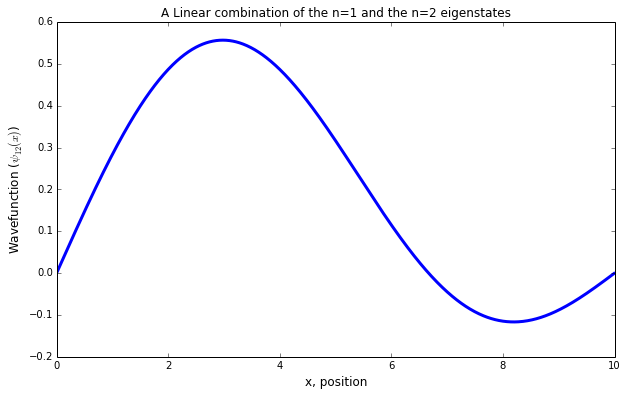

In [128]:
n1 = 1 
n2 = 2
c1 = 1.0/np.sqrt(2)
c2 = 1.0/np.sqrt(2)

################################
# IN ONE LINE BUILD A WAVE FUNCTION, psi_12, THAT IS A LINEAR COMBINATION OF THE n=1 AND n=2 EIGENSTATES, 
# WITH COEFFICIENTS c1 AND c2
psi_12 = 1.0/np.sqrt(2)*box_1D_eigenfunction(x, L, n1) + 1.0/np.sqrt(2)*box_1D_eigenfunction(x, L, n2)
################################

#Let's plot it:
fig=plt.figure(figsize=(10,6))
plt.plot(x,psi_12, linewidth=3)
plt.xlabel('x, position',fontsize=12)
plt.ylabel('Wavefunction ($\psi_{12}(x)$)',fontsize=12)
plt.title('A Linear combination of the n='+str(n1)+' and the n='+str(n2)+' eigenstates',fontsize=12)
plt.show()

### Now using the finite difference method, calculate the expectation value of the superposition of the n=1 and n=2 eigenstates.

In [129]:
#####################################################################
# CALCULATE THE RESULTS OF ACTING ON psi_12 WITH T (1 LINE OF CODE)
T_on_psi_12 = kinetic_energy_operator(x, psi_12)
# NOW MULTIPLY ON THE LEFT BY THE COMPLEX CONJUGATE OF psi_12, TO OBTAIN THE INTEGRAND (1 LINE OF CODE)
integrand = np.conjugate(psi_12)*T_on_psi_12
# NOW USE THE simps INTEGRATION TO GET THE EXPECTATION VALUE (1 LINE OF CODE)
T_numerical = simps( integrand, x )
#######################################################################
print "The expectation value of <T> for the superposition of n=1 and n=2, obtained numerically, is =", T_numerical

The expectation value of <T> for the superposition of n=1 and n=2, obtained numerically, is = 0.123369711687


### Now compare the numerical value with the analytical value

What do we expect $\rangle \hat{T} \langle$ should be in this case? In general, the expectation value of an operator $\hat{\Lambda}$ for a wavefunction that is a superposition of several eigenstates is:

$$<\hat{\Lambda}> = \sum_\lambda |c_\lambda|^2\lambda$$ 

where $c_{\lambda}$ represent the contribution of the $\lambda$-th eigenstate to the wavefunction. In this case, the previous formula translates to:

$$<\hat{T}>=|c_1|^2 T_1 + |c_2|^2 T_2 $$

Now complete the next box.

In [130]:
########################################################################
# WRITE THE ANALYTICAL EXPRESSION FOR WHAT <T> SHOULD BE EQUAL T (1 LINE OF CODE)
# HINT: Use the function you defined in step 5.
T_analytical = np.abs(c1**2.0)*analytical_T_n(n1, L) + np.abs(c2**2.0)*analytical_T_n(n2, L)
########################################################################

print "The expectation value of <T>, obtained analytically, should be =", T_analytical

The expectation value of <T>, obtained analytically, should be = 0.123370055014


Now we compare both values:

In [131]:
print "The difference between the analytical the the numerical expectation value of T is:", 
print T_analytical-T_numerical

The difference between the analytical the the numerical expectation value of T is: 3.43326179403e-07


## <i class="fa fa-book"></i> Step 7. Check what you learnt.

### In this demo we learnt:

### 1. The definition of the kinetic energy operator.

### 2. The analytical expression of the kinetic energy operator for the 1D-particle-in-a-box problem.

### 3. How to calculate the action of the kinetic energy operator and its expectation value numerically, using finite differences, for an arbitrary 1D wavefunction.

### 4. How expectation values are calculated for a superposition of eigenstates.